# 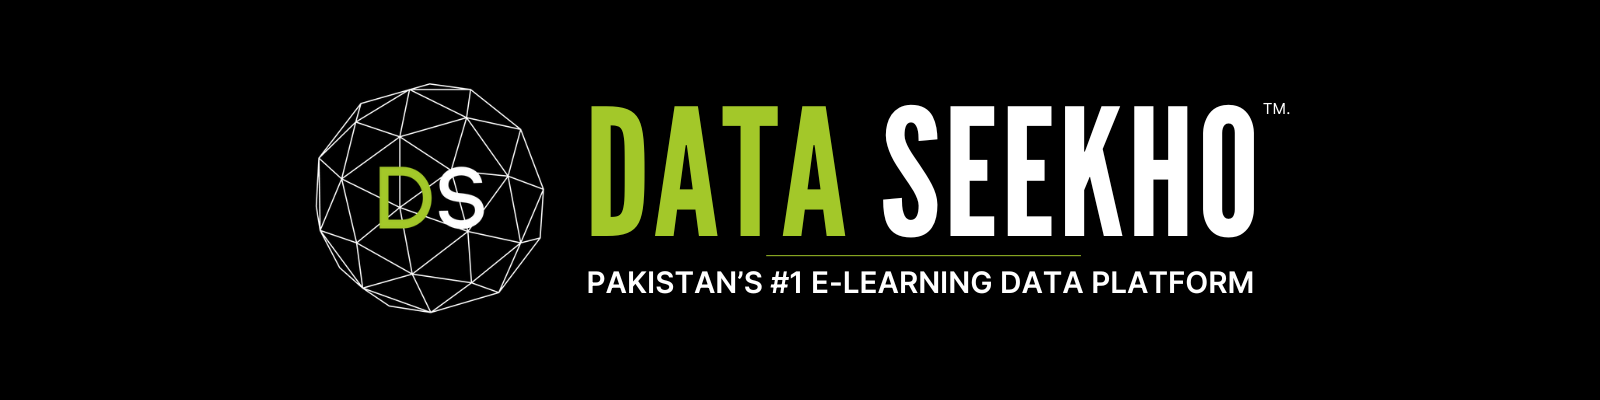

## 🚀 My Short Introduction! 🎓

- **Seemal Naveed** is an aspiring data professional at **Data Seekho**.
- 📚 Learning **Python, SQL, Machine Learning**, and more through **Data Seekho’s** courses.
- 💻 Engaging in **hands-on projects** and learning from **industry experts**.
- 🌟 Part of **Data Seekho’s supportive community**, aiming for top 1% in data.
- 🎯 Preparing for a **successful career** in Data Science with **Data Seekho**.

# 📊 **Sales Data Analysis Project**

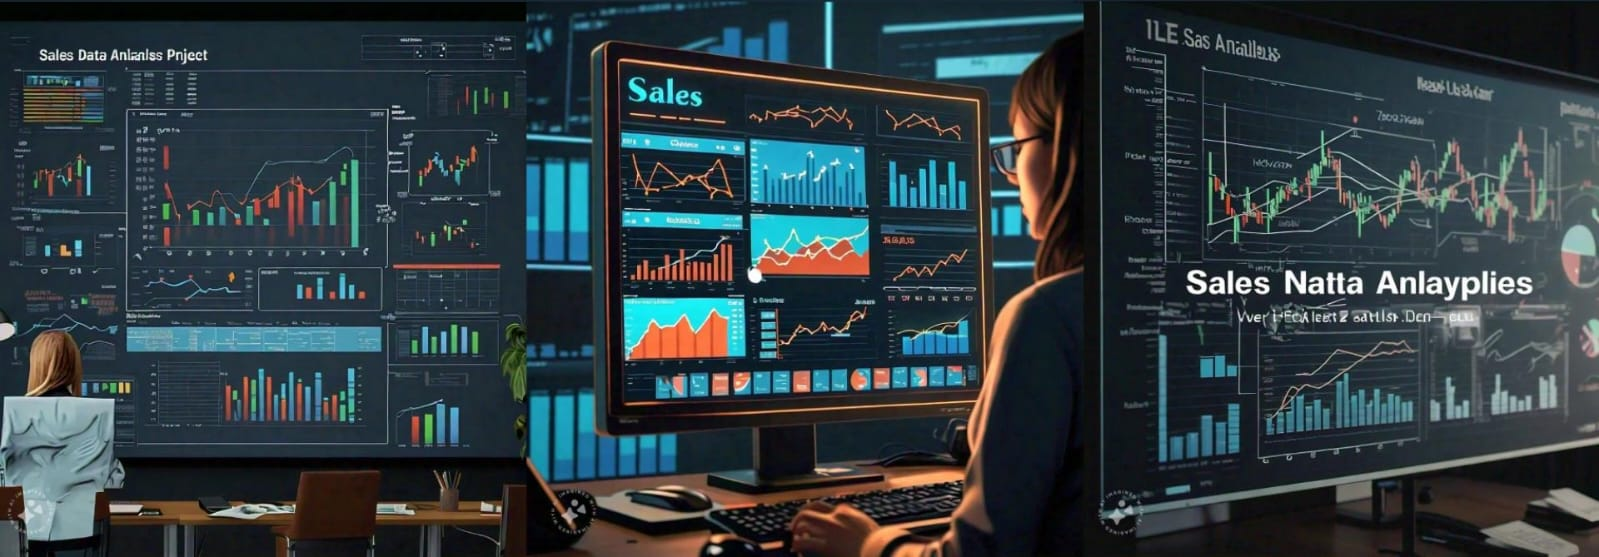

#### 📝 **Project Overview**

The objective of this project is to derive insights from customer and product sales data, focusing on total revenue, best-selling products, monthly sales trends, regional performance, and product category popularity. These insights will support data-driven business decisions in inventory and marketing.

**📊 Step 1: Data Setup and Introduction**

Let’s start by installing SQLite and creating the database for the analysis.

In [7]:
import sqlite3

# Create a database in memory (or a file if you prefer)
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create the table based on the provided dataset
cursor.execute('''
CREATE TABLE sales_data (
    OrderID INTEGER,
    CustomerID INTEGER,
    ProductID INTEGER,
    OrderDate TEXT,
    Quantity INTEGER,
    UnitPrice REAL,
    Region TEXT,
    Category TEXT
);
''')

# Insert the provided data into the table
cursor.executemany('''
INSERT INTO sales_data (OrderID, CustomerID, ProductID, OrderDate, Quantity, UnitPrice, Region, Category)
VALUES (?, ?, ?, ?, ?, ?, ?, ?);
''', [
    (1, 101, 201, '2024-01-05', 5, 20.00, 'North', 'Electronics'),
    (2, 102, 202, '2024-01-10', 2, 35.00, 'South', 'Home Appliances'),
    (3, 103, 203, '2024-02-15', 1, 120.00, 'East', 'Furniture'),
    (4, 104, 201, '2024-02-20', 10, 20.00, 'West', 'Electronics'),
    (5, 105, 204, '2024-03-01', 7, 50.00, 'North', 'Clothing'),
    (6, 106, 205, '2024-03-15', 4, 80.00, 'South', 'Footwear'),
    (7, 107, 206, '2024-04-05', 3, 100.00, 'East', 'Electronics'),
    (8, 108, 203, '2024-04-15', 2, 120.00, 'West', 'Furniture'),
    (9, 109, 204, '2024-05-05', 1, 50.00, 'North', 'Clothing'),
    (10, 110, 202, '2024-05-10', 8, 35.00, 'South', 'Home Appliances'),
    (11, 111, 207, '2024-06-05', 5, 25.00, 'East', 'Stationery'),
    (12, 112, 201, '2024-06-15', 6, 20.00, 'West', 'Electronics'),
    (13, 113, 208, '2024-07-05', 4, 15.00, 'North', 'Toys'),
    (14, 114, 206, '2024-07-10', 1, 100.00, 'South', 'Electronics'),
    (15, 115, 209, '2024-08-01', 3, 30.00, 'East', 'Books'),
    (16, 116, 210, '2024-08-15', 7, 45.00, 'West', 'Groceries'),
    (17, 117, 211, '2024-09-01', 2, 200.00, 'North', 'Jewelry'),
    (18, 118, 212, '2024-09-10', 5, 18.00, 'South', 'Accessories'),
    (19, 119, 202, '2024-10-01', 4, 35.00, 'East', 'Home Appliances'),
    (20, 120, 201, '2024-10-15', 9, 20.00, 'West', 'Electronics')
])

# Commit changes
conn.commit()


**💰 Step 2: Total Sales Revenue**

To find the total sales revenue, we need to calculate the revenue for each sale and then sum them all up.

In [8]:
# Query to calculate total sales revenue
cursor.execute('''
SELECT SUM(Quantity * UnitPrice) AS Total_Sales_Revenue
FROM sales_data;
''')

# Fetch and display the result
total_sales_revenue = cursor.fetchone()[0]
total_sales_revenue


3650.0

This query multiplies the Quantity by the UnitPrice for each transaction to get the total revenue per sale, and then we sum the results to get the total sales revenue.

**🏆 Step 3: Top 5 Best-Selling Products**

Here, we’ll identify the top 5 products based on the quantity sold.

In [9]:
# Query to find top 5 best-selling products
cursor.execute('''
SELECT ProductID, SUM(Quantity) AS Total_Quantity
FROM sales_data
GROUP BY ProductID
ORDER BY Total_Quantity DESC
LIMIT 5;
''')

# Fetch and display the result
top_5_best_selling_products = cursor.fetchall()
top_5_best_selling_products


[(201, 30), (202, 14), (204, 8), (210, 7), (212, 5)]

This query groups the data by ProductID and sums the quantity sold for each product, sorting them in descending order to get the top 5 products.

**📅 Step 4: Monthly Sales Trend**

We will calculate the monthly revenue for each month to identify trends.

In [10]:
# Query to calculate monthly sales revenue
cursor.execute('''
SELECT strftime('%Y-%m', OrderDate) AS Month, SUM(Quantity * UnitPrice) AS Monthly_Revenue
FROM sales_data
GROUP BY Month
ORDER BY Month;
''')

# Fetch and display the result
monthly_sales_trend = cursor.fetchall()
monthly_sales_trend


[('2024-01', 170.0),
 ('2024-02', 320.0),
 ('2024-03', 670.0),
 ('2024-04', 540.0),
 ('2024-05', 330.0),
 ('2024-06', 245.0),
 ('2024-07', 160.0),
 ('2024-08', 405.0),
 ('2024-09', 490.0),
 ('2024-10', 320.0)]

This query groups the data by month (formatted as Year-Month) and calculates the total revenue for each month.

**🌍 Step 5: Regional Sales Breakdown**

Now, let’s analyze the sales revenue for each region to understand where the highest sales are occurring.

In [11]:
# Query to calculate sales revenue by region
cursor.execute('''
SELECT Region, SUM(Quantity * UnitPrice) AS Regional_Sales_Revenue
FROM sales_data
GROUP BY Region
ORDER BY Regional_Sales_Revenue DESC;
''')

# Fetch and display the result
regional_sales_breakdown = cursor.fetchall()
regional_sales_breakdown


[('West', 1055.0), ('North', 960.0), ('South', 860.0), ('East', 775.0)]

This query groups the data by region and calculates the total revenue for each region.

**📦 Step 6: Most Popular Product Category**

Let’s determine which product category has the highest total sales in revenue.

In [12]:
# Query to calculate total revenue by category
cursor.execute('''
SELECT Category, SUM(Quantity * UnitPrice) AS Category_Sales_Revenue
FROM sales_data
GROUP BY Category
ORDER BY Category_Sales_Revenue DESC
LIMIT 1;
''')

# Fetch and display the result
most_popular_category = cursor.fetchone()
most_popular_category


('Electronics', 1000.0)

This query calculates the total revenue by product category and sorts the results to find the category with the highest sales.

### **📋 Step 7: Summary and Conclusion**

**Summary of Findings:**

**Total Sales Revenue:** We computed the total revenue across all sales.

**Top 5 Best-Selling Products**: We identified the top products based on the quantity sold.

**Monthly Sales Trends:** We analyzed revenue trends on a monthly basis.

**Regional Sales Breakdown:** We found out which regions contributed most to the sales.

**Most Popular Product Category:** We determined which product category generated the highest revenue.

### **Conclusion:**

By analyzing this sales data, businesses can understand product demand, regional performance, and category success. This can guide inventory decisions, marketing efforts, and resource allocation.

# **HAPPY CODING..**